# PEC 1 Asignatura Aprendizaje Automático Aplicado

## Máster en Data Science - UCJC

### Curso 2024/2025

Profesor: Francisco Lamas López - francisco.lamas@ucjc.edu

- Fecha de entrega a los alumnos: viernes **07ENE2025**


- Fecha límite de entrega de soluciones: lunes **21ENE2025**


- Fecha orientativa de correcciones: domingo **04FEB2025**

### INSTRUCCIONES:

Resolver individualmente los siguientes 3 ejercicios (cada uno de las cuales tiene idéntica valoración, 1/3 del total)


Se dará una puntuación sobre 10 a cada alumno para esta PEC1 (25% del total de PEC's)


Rellenar sobre este Notebook (entregar como archivo .ipynb)

**Aspectos importantes a tener en cuenta:**

- Seguir los pasos recomendados en cada uno de los 3 ejercicios (como listas de ítems en el markdown), ya que os servirán como guía para resolverlos

- Intentar siempre, en la parte de análisis y comparación, plotear y exponer gráficos cuando sea posible sobre los resultados obtenidos

- Comentar y argumentar los resultados obtenidos

**En caso de no poder entregarla a través del BlackBoard, enviar antes de la fecha límite al email francisco.lamas@ucjc.edu (explicar en el email error obtenido durante la subida a BlackBoard)**

### ALUMNO (RELLENAR ESTO CON: APELLIDOS, NOMBRE):

Rodríguez Muértegui, Sergio

### EMAIL ALUMNO:

sergio.rmuertegui@alumno.ucjc.edu

#### Uso de Datasets en la PEC1

En esta práctica, nos enfocaremos en utilizar los datasets que están específicamente incluidos en Scikit-learn. Es importante que todos los datasets que utilices provengan de la sección de **Toy Datasets** que puedes encontrar en la documentación oficial de Scikit-learn.

Puedes acceder a esta sección a través del siguiente enlace: [Toy Datasets en Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html).

Estos datasets han sido seleccionados por su utilidad y simplicidad para fines educativos, proporcionando una excelente oportunidad para aprender y practicar diversas técnicas de aprendizaje automático. Algunos ejemplos populares de estos datasets incluyen el *Iris dataset*, *Digits dataset*, *Wine dataset*, entre otros.

Asegúrate de explorar y utilizar estos datasets para tus ejercicios de la PEC1.


### EJERCICIO 1

##### Cargar un set de datos y división en distintos porcentajes de train/test


- Descarga un dataset de los reseñados arriba
- Describe las dimensiones del Dataset
- Define si es para hacer Regresión y Clasificación y por qué
- Divide los datos en conjuntos de TRAIN y TEST (en diferentes % de test). Pruebe diferentes parámetros del método train_test_split de Scikit-Learn
- Evalua las características, dimensiones y contenido de los conjuntos de datos resultantes al dividirlos

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

Cargamos el dataset `wine` de la libreria **Scikit-learn**, el cual posee información sobre el análisis químico del vino de 3 cultivadores distintos. Luego lo transformamos en un DataFrame denominado `vinos_data` y añadimos la variable categorica *target* la cual indica a que cultivador pertence el vino (0,1 ó 2).

In [2]:
vinos_raw=datasets.load_wine()
print(vinos_raw.keys(), '\n',
vinos_raw.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']) 
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [3]:
vinos_data=pd.DataFrame(vinos_raw.data, columns= vinos_raw.feature_names)

In [4]:
vinos_data['target']= vinos_raw.target

In [5]:
vinos_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
#Indicamos la dimensión del dataset (incluyendo la variable añadida target)
vinos_data.shape

(178, 14)

Para poder definir un dataset como **regresión** o **clasificación** es necesario analizar el **objetivo** que se desea predecir. En este caso, hemos añadido la variable categórica *target* la cual nos indica de que cultivador previene el vino, es decir, estamos utilizando una etiqueta o clase para ordenar y clasificar las distintas muestras de vino por lo que podemos asumir que el dataset que vamos a usar es para **clasificación**.

Sin embargo, si en lugar de eso queremos hacer predicciones sobre la cantidad de alcohol o magnesio del vino o sobre su color, usaremos las variables *alcohol*, *magnesium* o *hue* respectivamente, las cuales son variables numéricas continuas. En ese caso, el dataset que estaríamos usando sería para regresión pues intentamos predecir cuales serían los proximos valores más probables.

A continuación, se separará los datos de forma aleatoria en dos conjuntos de datos: de entrenamiento y de prueba. Se usará la variable categórica target como varibale objetivo por lo que está división para TRAIN y TEST será con un acercamiento en clasificación. Se realizarán tres separaciones donde se analizará la dimensión, proporción y características de cada uno

In [7]:
x=vinos_data.drop(columns='target')
y=vinos_data['target']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)
#Para conjuntos de menos de mil datos se suele usar test_size=0.2

In [9]:
#Comprobamos las dimensiones
print(f"Las dimensiones son:\nx_train:{x_train.shape}, x_test:{x_test.shape},\ny_train{y_train.shape}, y_test{y_test.shape}")

#Comprobamos el ratio de los datos de prueba y de entrenamiento
train_ratio= len(x_train)/(len(x_train)+len(x_test))
test_ratio= len(x_test)/(len(x_train)+len(x_test))

print(f'\nLa proporción de los conjuntos de datos son:\ntrain_ratio:{train_ratio}, test_ratio:{test_ratio}')

print(f'\nSe muestra una descripción del conjunto de datos entrenados:\n\n{x_train.describe}')

print(f'\nComprobamos si existe algún valor nulo:\n{x_train.isnull().sum()}')

print(f'\nLa cantidad de valores que hay de cada target es:{y_train.value_counts()}')

Las dimensiones son:
x_train:(142, 13), x_test:(36, 13),
y_train(142,), y_test(36,)

La proporción de los conjuntos de datos son:
train_ratio:0.797752808988764, test_ratio:0.20224719101123595

Se muestra una descripción del conjunto de datos entrenados:

<bound method NDFrame.describe of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
17     13.83        1.57  2.62               20.0      115.0           2.95   
162    12.85        3.27  2.58               22.0      106.0           1.65   
101    12.60        1.34  1.90               18.5       88.0           1.45   
134    12.51        1.24  2.25               17.5       85.0           2.00   
92     12.69        1.53  2.26               20.7       80.0           1.38   
..       ...         ...   ...                ...        ...            ...   
98     12.37        1.07  2.10               18.5       88.0           3.52   
16     14.30        1.92  2.72               20.0      120.0           2.80   


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)
#Para conjuntos de más de mil datos se suele usar test_size=0.3

In [11]:
#Comprobamos las dimensiones
print(f"Las dimensiones son:\nx_train:{x_train.shape}, x_test:{x_test.shape},\ny_train{y_train.shape}, y_test{y_test.shape}")

#Comprobamos el ratio de los datos de prueba y de entrenamiento
train_ratio= len(x_train)/(len(x_train)+len(x_test))
test_ratio= len(x_test)/(len(x_train)+len(x_test))

print(f'\nLa proporción de los conjuntos de datos son:\ntrain_ratio:{train_ratio}, test_ratio:{test_ratio}')

print(f'\nSe muestra una descripción del conjunto de datos entrenados:\n\n{x_train.describe}')

print(f'\nComprobamos si existe algún valor nulo:\n{x_train.isnull().sum()}')

print(f'\nLa cantidad de valores que hay de cada target es:{y_train.value_counts()}')

Las dimensiones son:
x_train:(124, 13), x_test:(54, 13),
y_train(124,), y_test(54,)

La proporción de los conjuntos de datos son:
train_ratio:0.6966292134831461, test_ratio:0.30337078651685395

Se muestra una descripción del conjunto de datos entrenados:

<bound method NDFrame.describe of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
177    14.13        4.10  2.74               24.5       96.0           2.05   
121    11.56        2.05  3.23               28.5      119.0           3.18   
14     14.38        1.87  2.38               12.0      102.0           3.30   
172    14.16        2.51  2.48               20.0       91.0           1.68   
129    12.04        4.30  2.38               22.0       80.0           2.10   
..       ...         ...   ...                ...        ...            ...   
98     12.37        1.07  2.10               18.5       88.0           3.52   
16     14.30        1.92  2.72               20.0      120.0           2.80   

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=13)
#Para realizar validación cruzada se suele usar test_size=0.1

In [13]:
#Comprobamos las dimensiones
print(f"Las dimensiones son:\nx_train:{x_train.shape}, x_test:{x_test.shape},\ny_train{y_train.shape}, y_test{y_test.shape}")

#Comprobamos el ratio de los datos de prueba y de entrenamiento
train_ratio= len(x_train)/(len(x_train)+len(x_test))
test_ratio= len(x_test)/(len(x_train)+len(x_test))

print(f'\nLa proporción de los conjuntos de datos son:\ntrain_ratio:{train_ratio}, test_ratio:{test_ratio}')

print(f'\nSe muestra una descripción del conjunto de datos entrenados:\n\n{x_train.describe}')

print(f'\nComprobamos si existe algún valor nulo:\n{x_train.isnull().sum()}')

print(f'\nLa cantidad de valores que hay de cada target es:{y_train.value_counts()}')

Las dimensiones son:
x_train:(160, 13), x_test:(18, 13),
y_train(160,), y_test(18,)

La proporción de los conjuntos de datos son:
train_ratio:0.898876404494382, test_ratio:0.10112359550561797

Se muestra una descripción del conjunto de datos entrenados:

<bound method NDFrame.describe of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
23     12.85        1.60  2.52               17.8       95.0           2.48   
68     13.34        0.94  2.36               17.0      110.0           2.53   
130    12.86        1.35  2.32               18.0      122.0           1.51   
128    12.37        1.63  2.30               24.5       88.0           2.22   
51     13.83        1.65  2.60               17.2       94.0           2.45   
..       ...         ...   ...                ...        ...            ...   
98     12.37        1.07  2.10               18.5       88.0           3.52   
16     14.30        1.92  2.72               20.0      120.0           2.80   


Se puede observar como en cada uno de los casos se respeta el ratio predefinido para los conjuntos de entrenamiento y prueba. Además, podemos confirmar que no se pierde ningún dato a la hora de realizar la partición.

##### Entrenar un modelo de clasificación KNN con un dataset de scikit learn y comparar resultados de predicción entre los conjuntos de train y de test

- Carga un dataset proporcionado por Scikit-Learn
- Prepara los datos para el entrenamiento del modelo, realizando cualquier paso de pre-procesamiento necesario
- Utiliza la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba. Ajusta los parámetros adecuadamente para una división equitativa
- Instancia un modelo KNN y entrena este modelo con el conjunto de entrenamiento
- Evalúa la precisión del modelo tanto en el conjunto de entrenamiento como en el de prueba
- Utiliza una métrica de evaluación adecuada para comparar el rendimiento en ambos conjuntos
- Analiza los resultados obtenidos (p.e. dibujar y plotear boundary decisions...) y extraer conclusiones pertinentes, especialmente en caso de encontrar diferencias significativas en el rendimiento entre los conjuntos de entrenamiento y prueba

Cargamos nuevamente el dataset `wine` y dividimos el dataset en conjuntos de entrenamiento y prueba.

In [14]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
vinos_raw=datasets.load_wine() #Cargamos dataset
vinos_data=pd.DataFrame(vinos_raw.data, columns= vinos_raw.feature_names) #Lo pasamos a un dataframe
vinos_data['target']= vinos_raw.target #Introducimos la columna target de valores categóricos

In [16]:
print(vinos_data.isnull().sum()) #Comprobamos si hay algun dato faltante

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [17]:
type(vinos_data.loc[1]['target']) #Comprobamos que la variable categórica es una variable numérica, encaso contrario deberiamos cambiarla

numpy.float64

In [18]:
X = vinos_data.drop(columns=['target'])
y = vinos_data['target']

Estandarizamos los valores para evitar que el modelo se vea sesgado por valores muy grandes o pequeños.

In [19]:
#Normalizamos los valores para evitar que el modelo se vea sesgado por valores muy grandes o pequeños.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Hacemos la desviación estandar de los datos

X_scaled = scaler.fit_transform(X)

Reducimos las dimensiones de los conjuntos de datos. Como la PCA es muy sensible al escalado, la realizamos posteriormente del estandarizado de los datos y antes de separar el conjunto de datos en entrenamiento y prueba. De esta forma se evita data leakage.

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [21]:
#Dividimos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=13)

A continuación, instanciamos y creamos el modelo KNN con 3 vecinos.

In [22]:
#Instanciamos y entrenamos el modelo KNN con 3 vecinos
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
#Hacemos predicciones
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [24]:
#Evaluamos el modelo
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Precisión del modelo KNN: {accuracy_test:.3f}')

Precisión del modelo KNN: 0.972


A continuación, visualizamos las decision bounderies junto con una representación de la matriz de confusión en un mapa de calor.

In [25]:
plt.style.use('ggplot') #Para cambiar la apariencia del plot

In [26]:
#Analizamos las decision boundaries
def plotDecisionBoundary(model, X, y, colors, padding=0.6, resolution = 0.0025):
    
  fig = plt.figure(figsize=(8,6))
  ax = fig.add_subplot(111)


  #Calculamos boundaries
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding


  #Crea la matriz 2D con los valores predecidos de sus clases
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))


  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  #Crea el mapa de colores de los contornos
  ax.contourf(xx, yy, Z, cmap=plt.cm.rainbow)
  fig.tight_layout(pad=2)

  #Muestra los puntos de prueba originales
  for label in np.unique(y):
    indices = np.where(y == label)
    ax.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.8)

  #Crea el titulo
  p = model.get_params()
  fig.suptitle('Decision boundaries, K = ' + str(p['n_neighbors']))

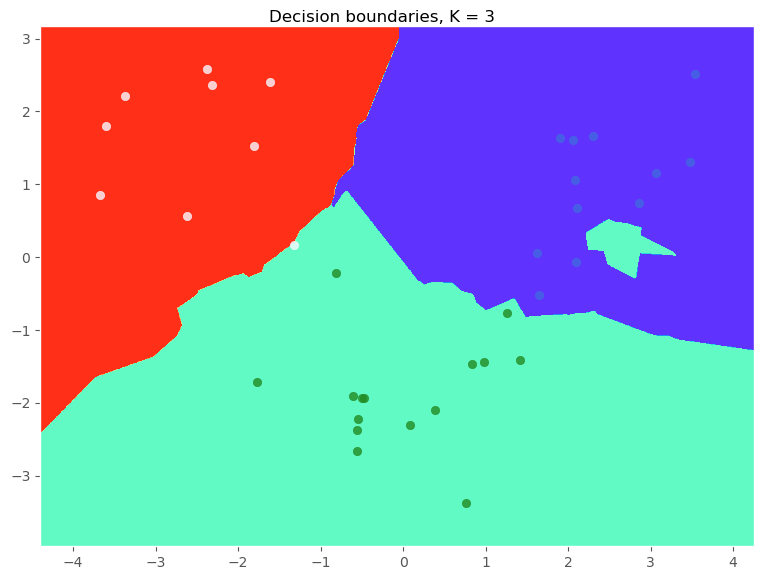

In [27]:
myColours = ['royalblue','forestgreen','ghostwhite']
plotDecisionBoundary(knn, X_test, y_test, colors =  myColours, padding = 0.1, resolution = 0.01)

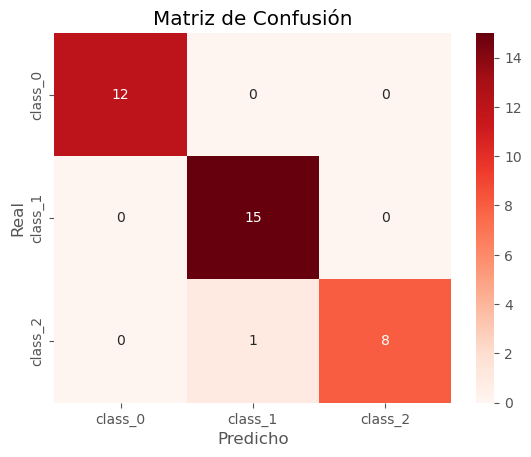


Reporte de Clasificación:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.94      1.00      0.97        15
     class_2       1.00      0.89      0.94         9

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36


Matriz de Confusión:
[[12  0  0]
 [ 0 15  0]
 [ 0  1  8]]


In [28]:
#Comprobamos la matriz de confusión usando un mapa de calor para mejor visualización
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d', xticklabels=vinos_raw.target_names, yticklabels=vinos_raw.target_names)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")

plt.show()

#Mostramos un reporte con información general de la Clasificación realizada
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_test_pred, target_names=vinos_raw.target_names))
print("\nMatriz de Confusión:")
print(cm)

Se puede observar en el gráfico de las Decision Bounderies, la Matriz de Confusión y el Reporte de Clasificación que el modelo es capaz de clasificar de forma correcta los datos sin incurrir en ningún tipo de over-fitting, obligando al modelo a que recoja todos los datos para cada clase, o de under-fitting, dejando muchos datos fuera y haciendo que las clases estén muy mezcladas entre sí. Además, pudimos comprobar que existe una precisión del *97%*, lo cual es sinónimo de una buena clasificación. Solo se ha clasificado incorrectamenta una muestra la cual se predijo que pertenecía a la clase 1 y resultó ser de la clase 2.

##### Evaluación del Impacto de Parámetros en un Modelo KNN con Scikit-Learn

- Elige y carga un dataset proporcionado por Scikit-Learn que sea adecuado para un modelo de clasificación KNN
- Realiza cualquier pre-procesamiento necesario en el dataset
- Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split.
- Elige al menos dos parámetros importantes del modelo KNN para evaluar. Algunas sugerencias pueden ser el número de vecinos (n_neighbors) y el tipo de ponderación de los vecinos (weights)
- Para cada parámetro, entrena múltiples modelos variando los valores de dicho parámetro mientras mantienes constantes los otros
- Utiliza una métrica de rendimiento adecuada, como la precisión, para evaluar el impacto de los distintos valores de cada parámetro en el rendimiento del modelo.
- Realiza este proceso para cada parámetro de forma independiente y registra los resultados
- Determina qué combinaciones de parámetros ofrecen los mejores resultados y saca conclusiones sobre la importancia de cada parámetro evaluado

Cargamos el dataset `wine` y realizamos el mismo pre-procesiamiento.

In [29]:
vinos_raw=datasets.load_wine() #Cargamos dataset
vinos_data=pd.DataFrame(vinos_raw.data, columns= vinos_raw.feature_names) #Lo pasamos a un dataframe
vinos_data['target']= vinos_raw.target #Introducimos la columna target de valores categóricos
print(vinos_data.isnull().sum()) #Comprobamos si hay algun dato faltante
type(vinos_data.loc[1]['target']) #Comprobamos que la variable categórica es una variable numérica, encaso contrario deberiamos cambiarla

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


numpy.float64

In [30]:
X = vinos_data.drop(columns=['target'])
y = vinos_data['target']

#Dividimos en entrenamiento y prueba (50% entrenamiento, 50% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

A continuación crearemos un bucle for el cual parán el conjunto de datos de entrenamiento y prueba para que sean escalados usando diferentes procedimientos (*Normalizer, StandardScaler, Min-Max, RobustScaler*), para que luego se les reduzca la dimensión usando PCA y por último entrenandolos en un modelo de clasificación KNN. Nos devolverá los mejores parámetros para el modelo.

In [31]:
from sklearn import preprocessing

In [32]:
reducers = [False, True]
weights = ['uniform', 'distance']

scalers = [preprocessing.Normalizer, preprocessing.StandardScaler,
           preprocessing.MinMaxScaler, preprocessing.RobustScaler]

In [33]:
from sklearn import manifold

In [34]:
separator = "--------------------------------------"
print('*** Starting K-neighbours classifier')
print(separator)

bestScore = 0.0

# Cramos un primer bucle donde iran alternando los escalares
for scaler in scalers:
  print("* Scaler = ", scaler)

  scalerTrained = scaler().fit(X_train)
  
  X_train_scaled = scalerTrained.transform(X_train)
  X_test_scaled  = scalerTrained.transform(X_test)
  

  print("PCA?  | K  | Weight | Score")
  print(separator)
  
  #En este bucle alternamos el uso de PCA para los diferentes K
    
  reducer = None

  for isPCA in reducers:
    if isPCA:
        
    #Implementamos PCA para dos dimensiones.
      reducer = PCA(n_components=2).fit(X_train_scaled)

    else:

    #Implementamos Isomap

      reducer = manifold.Isomap(n_neighbors=10, n_components=2).fit(X_train_scaled)

    #Transformación en 2D de ambos datasets
    X_train_reduced = reducer.transform(X_train_scaled)
    X_test_reduced  = reducer.transform(X_test_scaled)

    for k in range(1,16):
        for weight in weights:

            
            #Entrenamos el modelo
            
            knmodel = KNeighborsClassifier(n_neighbors = k, weights = weight)
            knmodel.fit(X_train_reduced, y_train) 
            
            #Calculamos la precisión del modelo

            currentScore = knmodel.score(X_test_reduced, y_test)
        
            print(f"{isPCA} | {k} | {weight} | {currentScore}")
    
            #Guarda el mejor modelo para mostrarlo posteriormente
            if (currentScore > bestScore):
                bestScore = currentScore
                bestPCA = isPCA
                bestK = k
                bestWeight = weight
                bestScaler = scaler

*** Starting K-neighbours classifier
--------------------------------------
* Scaler =  <class 'sklearn.preprocessing._data.Normalizer'>
PCA?  | K  | Weight | Score
--------------------------------------
False | 1 | uniform | 0.6851851851851852
False | 1 | distance | 0.6851851851851852
False | 2 | uniform | 0.6666666666666666
False | 2 | distance | 0.6851851851851852
False | 3 | uniform | 0.6481481481481481
False | 3 | distance | 0.6666666666666666
False | 4 | uniform | 0.7037037037037037
False | 4 | distance | 0.6851851851851852
False | 5 | uniform | 0.7037037037037037
False | 5 | distance | 0.6851851851851852
False | 6 | uniform | 0.7222222222222222
False | 6 | distance | 0.6851851851851852
False | 7 | uniform | 0.7037037037037037
False | 7 | distance | 0.6851851851851852
False | 8 | uniform | 0.7222222222222222
False | 8 | distance | 0.6666666666666666
False | 9 | uniform | 0.7037037037037037
False | 9 | distance | 0.6851851851851852
False | 10 | uniform | 0.6851851851851852
False |

In [35]:
#Mostramos los mejores parámetros para el modelo
print("Estos son los mejores parámetros para el modelo:")
print("PCA?  | K  | Weight | Scaler | Score")
print(f"{bestPCA}  | {bestK} | {bestWeight} | {bestScaler} | {bestScore}")

Estos son los mejores parámetros para el modelo:
PCA?  | K  | Weight | Scaler | Score
True  | 5 | distance | <class 'sklearn.preprocessing._data.MinMaxScaler'> | 0.9814814814814815


A continuación aplicaremos el modelo para los mejores parámetros y mostraremos la clasificación.

In [36]:
BestScalerTrained = bestScaler().fit(X_train) #Mejor Scaler

#Escalado de los set de entrenamiento y test
X_train_scaled = BestScalerTrained.transform(X_train)
X_test_scaled  = BestScalerTrained.transform(X_test)

#Aplicación de PCA en caso de ser requerida
if isPCA:

    reducer = PCA(n_components=2).fit(X_train_scaled)

else:

    reducer = manifold.Isomap(n_neighbors=10, n_components=2).fit(X_train_scaled)


X_train_reduced = reducer.transform(X_train_scaled)
X_test_reduced  = reducer.transform(X_test_scaled)

#Estanciamos y entrenamos el modelo
bestKnmodel = KNeighborsClassifier(n_neighbors = bestK, weights = bestWeight)
bestKnmodel.fit(X_train_reduced, y_train) 

KNeighborsClassifier(weights='distance')

In [37]:
#Hacemos predicciones
y_pred = bestKnmodel.predict(X_test_reduced)

In [38]:
#Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo KNN: {accuracy:.2f}')

Precisión del modelo KNN: 0.98


In [39]:
def plotDecisionBoundary(model, X, y, colors, padding=0.6, resolution = 0.0025):
    
  fig = plt.figure(figsize=(8,6))
  ax = fig.add_subplot(111)


  #Calculamos boundaries
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding


  #Crea la matriz 2D con los valores predecidos de sus clases
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))


  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  #Crea el mapa de colores de los contornos
  ax.contourf(xx, yy, Z, cmap=plt.cm.rainbow)
  fig.tight_layout(pad=2)

  #Muestra los puntos de prueba originales
  for label in np.unique(y):
    indices = np.where(y == label)
    ax.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.8)

  #Crea el titulo
  p = model.get_params()
  fig.suptitle('Decision boundaries, K = ' + str(p['n_neighbors']))

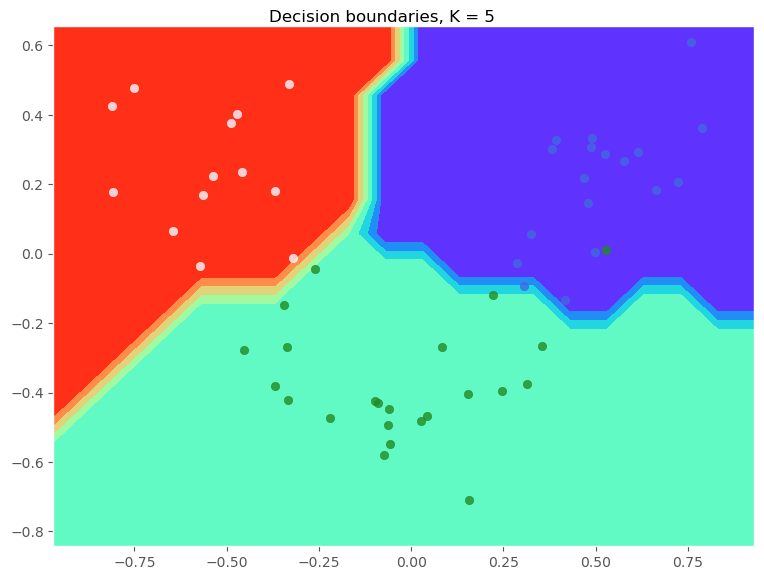

In [40]:
myColours = ['royalblue','forestgreen','ghostwhite']
plotDecisionBoundary(bestKnmodel, X_test_reduced, y_test, colors =  myColours, padding = 0.1, resolution = 0.1)

Realizamos nuevamente la clasificación, pero esta vez hemos usado el modelo con los mejores parámetros posibles, y aunque a simple viste sea complicado contrastar, vemos que usando este modelo hemos ganado un *1%* más de precisión que en el modelo realizado en el apartado anterior, en el cual tuvimos un *97%* de precisión. Por lo tanto, podemos confirmar que este modelo es mejor para clasificar a que cultivador pertenece el vino que el usado en el apartado anterior.

### EJERCICIO 2

##### Evaluación de la Influencia de la Normalización en Modelos de Regresión con Scikit-Learn

- Elige y carga un dataset de regresión proporcionado por Scikit-Learn
- Utiliza la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba
- Elige un modelo de regresión para la evaluación. Por ejemplo, puedes elegir la Regresión Lineal o la Regresión de Ridge
- Estos modelos son representativos y permiten evaluar cómo la normalización influye en diferentes enfoques de regresión (Influye más con Ridge)
- Selecciona al menos dos métodos de normalización, como la normalización Min-Max y la estandarización StandardScaler
- Aplica cada método de normalización por separado al conjunto de entrenamiento y ajusta el conjunto de prueba de manera correspondiente
- Para cada versión normalizada del conjunto de entrenamiento, entrena ambos modelos de regresión seleccionados
- Mantén constantes los demás parámetros del modelo para cada tipo de normalización para asegurar una comparación justa
- Utiliza métricas de rendimiento adecuadas para la regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R²), para evaluar cada modelo en el conjunto de prueba
- Compara el rendimiento de los modelos con diferentes métodos de normalización
- Basándote en los resultados, concluye sobre la importancia de la normalización en los modelos de regresión seleccionados y su influencia en la precisión del modelo

In [41]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

Nuevamente cargamos el dataset `wine`, pero esta vez, como realizaremos una regresión lineal, no añadiremos la variable *target* de clasificación, si no que usaremos la variable numérica continua *alcohol*. Esta variable nos indica la cantidad de alcohol encontrada en las muestras de vino tomadas, por lo que al realizar una regresión lineal estaremos intentando buscar una relación entre esta variable y las demás que nos ayude a predecir valores futuros. 

In [42]:
#Cargamos dataset de vinos
vinos_raw=datasets.load_wine()
vinos_data=pd.DataFrame(vinos_raw.data, columns= vinos_raw.feature_names)

In [43]:
#Definimos las características y la varibale objetivo (Analizaremos el alcohol de los vinos)
X= vinos_data.drop(columns='alcohol') #Nos quedamos con todo menos la variable oobjetivo
y=vinos_data['alcohol'] #variable objetivo

In [44]:
#Ahora dividimos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Escalaremos los datos usando el `MinMaxScaler` y `StandardScaler`. Luego aplicamos a ambos conjuntos escalados el modelo de Regresión Lineal y el modelo de Ridge.

In [45]:
#Min-Max
minmax= MinMaxScaler()
X_train_mm = minmax.fit_transform(X_train)
X_test_mm = minmax.fit_transform(X_test)

#Standard
std= StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [46]:
#Modelo Regresión Lineal
model_lr= LinearRegression()
model_lr.fit(X_train_mm, y_train)

LinearRegression()

In [47]:
model_lr.fit(X_train_std, y_train)

LinearRegression()

In [48]:
#Modelor Ridge
model_rdg= Ridge(alpha=1.0)
model_rdg.fit(X_train_mm, y_train)

Ridge()

In [49]:
model_rdg.fit(X_train_std, y_train)

Ridge()

In [50]:
#Predicciones Regresión Lineal
y_pred_lr_mm = model_lr.predict(X_test_mm)
y_pred_lr_std = model_lr.predict(X_test_std)

#Predicciones Ridge
y_pred_rdg_mm = model_lr.predict(X_test_mm)
y_pred_rdg_std = model_lr.predict(X_test_std)

A continuación, evaluamos el rendimiento de ambos modelos por medio del Error Cuadrático Medio (MSE) y el Coeficiente de Determinación ($R^2$). Si el MSE tiene valores bajos significa que los errores entre los valores reales y predichos son pequeño y si $R^2$ se encuentra cercano al valor 1 entonces es posible asumir que el modelo explica bien la varibilidad del alcohol. En cambio, si los valores de MSE son altos o si $R^2$ es cercano a 0 el modelo no realiza una buena predicción.

In [51]:
#Evaluamos el rendimiento del modelo de Regresión Lineal
mse_lr_mm = mean_squared_error(y_test, y_pred_lr_mm)
r2_lr_mm = r2_score(y_test, y_pred_lr_mm)

mse_lr_std = mean_squared_error(y_test, y_pred_lr_std)
r2_lr_std = r2_score(y_test, y_pred_lr_std)

#Evaluamos el rendimiento del modelo de Ridge
mse_rdg_mm = mean_squared_error(y_test, y_pred_rdg_mm)
r2_rdg_mm = r2_score(y_test, y_pred_rdg_mm)

mse_rdg_std = mean_squared_error(y_test, y_pred_rdg_std)
r2_rdg_std = r2_score(y_test, y_pred_rdg_std)


In [52]:
#Mostramos el rendimiento de ambos modelos
print(f'Error Cuadrático Medio (MSE) para el Modelo de Regresión Lineal con la normalización Min-Max: {mse_lr_mm:.4f}')
print(f'Error Cuadrático Medio (MSE) para el Modelo de Regresión Lineal con la estandarización StandardScaler: {mse_lr_std:.4f}')
print(f'Error Cuadrático Medio (MSE) para el Modelo de Ridge con la normalización Min-Max: {mse_rdg_mm:.4f}')
print(f'Error Cuadrático Medio (MSE) para el Modelo de Ridge con la estandarización StandardScaler: {mse_rdg_std:.4f}')
print('-----------------------------------------------------------------------')
print(f'Coeficiente de Determinación (R²) para el Modelo de Regresión Lineal con la normalización Min-Max: {r2_lr_mm:.4f}')
print(f'Coeficiente de Determinación (R²) para el Modelo de Regresión Lineal con la estandarización StandardScaler: {r2_lr_std:.4f}')
print(f'Coeficiente de Determinación (R²) para el Modelo de Ridge con la normalización Min-Max: {r2_rdg_mm:.4f}')
print(f'Coeficiente de Determinación (R²) para el Modelo de Ridge con la estandarización StandardScaler: {r2_rdg_std:.4f}')

Error Cuadrático Medio (MSE) para el Modelo de Regresión Lineal con la normalización Min-Max: 0.6105
Error Cuadrático Medio (MSE) para el Modelo de Regresión Lineal con la estandarización StandardScaler: 0.2176
Error Cuadrático Medio (MSE) para el Modelo de Ridge con la normalización Min-Max: 0.6105
Error Cuadrático Medio (MSE) para el Modelo de Ridge con la estandarización StandardScaler: 0.2176
-----------------------------------------------------------------------
Coeficiente de Determinación (R²) para el Modelo de Regresión Lineal con la normalización Min-Max: 0.0080
Coeficiente de Determinación (R²) para el Modelo de Regresión Lineal con la estandarización StandardScaler: 0.6464
Coeficiente de Determinación (R²) para el Modelo de Ridge con la normalización Min-Max: 0.0080
Coeficiente de Determinación (R²) para el Modelo de Ridge con la estandarización StandardScaler: 0.6464


Podemos observar que para ambos tipos de Regresiones (Lineal y de Ridge), escalar usando Min-Max no da buenos resultados pues el error cuadrático medio (MSE) es muy elevado y los valores del Coeficiente de Determinación son muy próximos a 0, por lo que estos modelos quedan descartados. Usar el método de StandardScaler aporta mejores resultados de MSE y $R^2$ en comparación.

Para finalizar, mostraremos una grafica con las regresiones para comprobar de forma visual el comportamiento de los modelos.

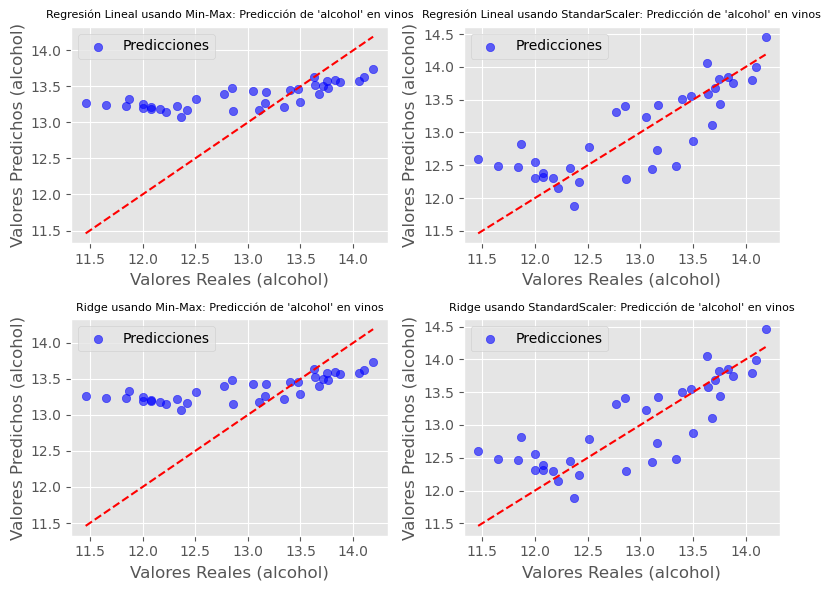

In [53]:
fig, ax = plt.subplots(2,2, figsize=(8,6))

ax[0,0].scatter(y_test, y_pred_lr_mm, color='blue', alpha=0.6, label="Predicciones")
ax[0,0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
ax[0,0].set_xlabel("Valores Reales (alcohol)")
ax[0,0].set_ylabel("Valores Predichos (alcohol)")
ax[0,0].legend()
ax[0,0].set_title("Regresión Lineal usando Min-Max: Predicción de 'alcohol' en vinos", fontsize=8)

ax[0,1].scatter(y_test, y_pred_lr_std, color='blue', alpha=0.6, label="Predicciones")
ax[0,1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
ax[0,1].set_xlabel("Valores Reales (alcohol)")
ax[0,1].set_ylabel("Valores Predichos (alcohol)")
ax[0,1].legend()
ax[0,1].set_title("Regresión Lineal usando StandarScaler: Predicción de 'alcohol' en vinos", fontsize=8)

ax[1,0].scatter(y_test, y_pred_rdg_mm, color='blue', alpha=0.6, label="Predicciones")
ax[1,0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
ax[1,0].set_xlabel("Valores Reales (alcohol)")
ax[1,0].set_ylabel("Valores Predichos (alcohol)")
ax[1,0].legend()
ax[1,0].set_title("Ridge usando Min-Max: Predicción de 'alcohol' en vinos", fontsize=8)

ax[1,1].scatter(y_test, y_pred_rdg_std, color='blue', alpha=0.6, label="Predicciones")
ax[1,1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
ax[1,1].set_xlabel("Valores Reales (alcohol)")
ax[1,1].set_ylabel("Valores Predichos (alcohol)")
ax[1,1].legend()
ax[1,1].set_title("Ridge usando StandardScaler: Predicción de 'alcohol' en vinos", fontsize=8)

plt.tight_layout()
plt.show()

Como ya analizamos previamente, los modelos usando el escalado Min-Max no son capaces de ajustarse correctamente, al contrario que sucede con aquellos que se usa el StandardScaler los cuales nos permitiría realizar predicciones en casa de obtener nueva información.

##### Comparación de Modelos de Regresión Ridge, Lasso y Elastic Net con Scikit-Learn

- Importa los módulos necesarios para utilizar la regresión Ridge, Lasso y Elastic Net
- Elige y carga un dataset de Scikit-Learn adecuado para la regresión
- Realiza cualquier pre-procesamiento necesario en el dataset, **como la normalización de características si es necesario**
- Divide el dataset en conjuntos de entrenamiento y prueba usando la función train_test_split
- Configura y entrena un modelo de regresión para Ridge, Lasso y Elastic Net con el conjunto de entrenamiento.
- Asegúrate de experimentar con diferentes hiperparámetros para cada modelo, como el coeficiente de regularización
- Evalúa cada modelo con el conjunto de prueba utilizando métricas adecuadas para regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R²)
- Compara cómo diferentes valores de hiperparámetros afectan el rendimiento de cada modelo.
- Analiza los resultados obtenidos y determina cuál modelo y configuración de hiperparámetros ofrece el mejor rendimiento
- Concluye sobre las características de cada modelo y cómo influyen en el ajuste a los datos

In [54]:
#Importamos los modulos necesarios
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Cargamos nuevamente el dataset `wine` de la libreria **Scikit-learn** y le aplicamos el preprocesamiento. Posteriormente dividimos el conjunto de datos y estandarizamos los conjuntos de datos de entrenamiento y prueba.

In [55]:
#Cargamos dataset de vinos
vinos_raw=datasets.load_wine()
vinos_data=pd.DataFrame(vinos_raw.data, columns= vinos_raw.feature_names)
print(f'\nComprobamos si existe algún valor nulo:\n{vinos_data.isnull().sum()}')


Comprobamos si existe algún valor nulo:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [56]:
#Definimos las características y la varibale objetivo (Analizaremos el alcohol de los vinos)
X= vinos_data.drop(columns='alcohol') #Nos quedamos con todo menos la variable oobjetivo
y=vinos_data['alcohol'] #variable objetivo

In [57]:
#Ahora dividimos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [58]:
#Standard (ya que aportó mejores resultados)
std= StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.fit_transform(X_test)

Una vez tenemos nuestros datos escalados, procedemos a realizar los modelos de Ridge, Lasso y ElasticNet escogiendo para cada uno de ellos distintos hiperparámetros y obteniendo cual es el mejor para el modelo. Una vez hayamos obtenido el modelo de cada uno, los añadimos a una tabla de `resultados` para analizarlos conjuntamente. 

In [59]:
#Modelo RidgeCV
model_rdgcv= RidgeCV(cv=5, alphas=(0.2, 0.4, 0.6, 0.8, 1.0))
model_rdgcv.fit(X_train_scaled, y_train)
y_pred_train_rdgcv = model_rdgcv.predict(X_train_scaled)
y_pred_test_rdgcv = model_rdgcv.predict(X_test_scaled)

In [60]:
columns = ['Model', 'Train error', 'Test error', 'Sum of Absolute Weights']

modelo1 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (model_rdgcv.coef_[0], 
                                        model_rdgcv.coef_[1], model_rdgcv.coef_[2], 
                                        model_rdgcv.coef_[3], model_rdgcv.coef_[4], model_rdgcv.intercept_)
values_rdgcv = [ modelo1, np.sqrt(mean_squared_error(y_train, y_pred_train_rdgcv)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_rdgcv)),
           np.absolute(model_rdgcv.coef_).sum() + np.absolute(model_rdgcv.intercept_)]
print("Selected alpha = %.2f" % model_rdgcv.alpha_)

rdgcv_results = pd.DataFrame([values_rdgcv], columns=columns, index=['RidgeCV'])
results = pd.DataFrame()
results = pd.concat([results, rdgcv_results])
results

Selected alpha = 1.00


,Model,Train error,Test error,Sum of Absolute Weights
RidgeCV,0.18 X + 0.04 X2 + -0.12 X3 + -0.06 X4 + 0.04 ...,0.537576,0.4639,14.573275


In [61]:
#Modelo LassoCV
model_lassocv= LassoCV(cv=5, alphas=(0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 1.0))
model_lassocv.fit(X_train_scaled, y_train)
y_pred_train_lassocv = model_lassocv.predict(X_train_scaled)
y_pred_test_lassocv = model_lassocv.predict(X_test_scaled)

In [62]:
modelo2 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (model_lassocv.coef_[0], 
                                        model_lassocv.coef_[1], model_lassocv.coef_[2], 
                                        model_lassocv.coef_[3], model_lassocv.coef_[4], model_lassocv.intercept_)
values_lassocv = [ modelo2, np.sqrt(mean_squared_error(y_train, y_pred_train_lassocv)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_lassocv)),
           np.absolute(model_lassocv.coef_).sum() + np.absolute(model_lassocv.intercept_)]
print("Selected alpha = %.2f" % model_lassocv.alpha_)

lassocv_results = pd.DataFrame([values_lassocv], columns=columns, index=['LassoCV'])
results = pd.concat([results, lassocv_results])
results 

Selected alpha = 0.02


,Model,Train error,Test error,Sum of Absolute Weights
RidgeCV,0.18 X + 0.04 X2 + -0.12 X3 + -0.06 X4 + 0.04 ...,0.537576,0.463900,14.573275
LassoCV,0.13 X + 0.00 X2 + -0.10 X3 + -0.01 X4 + 0.01 ...,0.544757,0.446459,14.043243


In [63]:
#Model ElasticNetCV
model_encv = ElasticNetCV(alphas=(0.01, 0.02, 0.05, 0.1, 0.5, 1.0, 10.0), l1_ratio=0.5)
model_encv.fit(X_train_scaled, y_train)
y_pred_train_encv = model_encv.predict(X_train_scaled)
y_pred_test_encv = model_encv.predict(X_test_scaled)

In [64]:
modelo3 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (model_encv.coef_[0], 
                                        model_encv.coef_[1], model_encv.coef_[2], 
                                        model_encv.coef_[3], model_encv.coef_[4], model_encv.intercept_)
values_encv = [ modelo3, np.sqrt(mean_squared_error(y_train, y_pred_train_encv)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_encv)),
           np.absolute(model_encv.coef_).sum() + np.absolute(model_encv.intercept_)]
print("Selected alpha = %.2f" % model_encv.alpha_)

encv_results = pd.DataFrame([values_encv], columns=columns, index=['ElasticNetCV'])
results = pd.concat([results, encv_results])
results 

Selected alpha = 0.05


,Model,Train error,Test error,Sum of Absolute Weights
RidgeCV,0.18 X + 0.04 X2 + -0.12 X3 + -0.06 X4 + 0.04 ...,0.537576,0.463900,14.573275
LassoCV,0.13 X + 0.00 X2 + -0.10 X3 + -0.01 X4 + 0.01 ...,0.544757,0.446459,14.043243
ElasticNetCV,0.12 X + 0.00 X2 + -0.09 X3 + -0.00 X4 + 0.02 ...,0.547611,0.442493,13.979857


En la tabla superior se encuentran los 3 modelos usando el hiperparámetro alfa que mejor se le ajusta a cada uno. Acompañado del modelo, se encuentran los Errores Cuadrados Medios del conjunto de entrenamiento y de prueba y la Suma de los Pesos Absolutos.

Para poder enteder correctamente la información en esta tabla, primero debemos conocer el comportamiento de los tres modelos.
+ El **modelo Ridge**, utiliza una penalización L2 (*proporcional al cuadrado de los coeficientes del modelo*) y es útil cuando es necesario regularizar el modelo sub hacer que los coeficientes sean cero, es decir, cuando todas las caracteristicas son importantes.

+ El **modelo Lasso**, utiliza una penalización L1 (*proporcional a la suma de los valores absolutos de los coeficientes*) y como tiende a eliminar características importantes, se suele utilizar cuando hay varias características irrelevantes.

+ El **modelo ElasticNet**, utiliza penalizaciones L1 y L2 y es usado cuando se tienen varias características correlacionas pues se encuentra a medio camino de los dos modelos anteriores.


Luego, analizando los valores de los MSE de entrenamiento y prueba, es seguro afirmar que el mejor modelo es el ElasticNet porque posee el menor valor en el error del conjunto de entrenamiento, implicando que genera mejor los datos que los otros dos modelos.

Los pesos, sin embargo, representan la importancia de cada variable en la predicción. Que la suma de los pesos absolutos sea baja, como es el caso de ElasticNet cuyo valor es el mas abajo, indica que ha reducido más los coeficientes o incluso a eliminados a algunos. Lo mismo podemos decir del modelo Lasso ya que el valor de la suma no es muy distinto del modelo ElasticNet. Por otra parte, el modelo Ridge es el que posee un mayor valor de la suma, implicando que ha conservado más caracteristicas que los otros dos modelos. Este resultado tiene sentido, pues como ya se comentó previamente, el modelo Ridge se usa cuando hay una gran cantidad de caracteristicas importantes.

Teniendo en cuenta que buscamos el modelo que mejor se adpate, el que mejor entra en esa definición es aquel que posea el menor MSE, por lo tanto, se concluye que el mejor modelo es el de que usa una regresión de ElasticNet.


### EJERCICIO 3

##### Realización de estrategias diferentes de Cross-Validation sobre un conjunto de datos y evaluar los resultados

- Elige y carga un dataset proporcionado por Scikit-Learn que sea adecuado para el tipo de análisis que vas a realizar
- Si es necesario, realiza preprocesamientos como la **normalización** o la codificación de variables categóricas
- Elige un modelo de aprendizaje automático de Scikit-Learn adecuado para tu dataset entre los vistos en clase hasta ahora
- Selecciona al menos dos estrategias de validación cruzada para comparar. Por ejemplo, podrías elegir la validación cruzada K-Fold estándar (que la puedes configurar directamente con un número en el método cross_val_score), la validación cruzada estratificada (Stratified K-Fold) o la Repeated Stratified K-Fold
- Utiliza las funciones de Scikit-Learn para aplicar cada estrategia de validación cruzada al modelo y al conjunto de datos
- Registra los resultados de rendimiento que establezcas para cada iteración de la validación cruzada
- Analiza los resultados obtenidos de cada estrategia de validación cruzada
- Compara las métricas de rendimiento que establezcas, entre las diferentes estrategias, para ver cuál de los Cross-Validation ofrece una evaluación más robusta o resultados más consistentes (evaluar dispersión de los resultados para las repeticiones de cada fold)
- Reflexiona sobre cómo la elección de la estrategia de validación cruzada puede influir en la interpretación de la capacidad predictiva del modelo

In [65]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Cargamos nuevamente el dataset `wine` de la libreria **Scikit-learn** y le aplicamos el preprocesamiento. En este caso, no dividimos manuealmente las datos en conjutnos de entrenamiento y prueba ya de ello se encargan directamente las estrategias de **K-Fold** y **Stratified K-Fold**. Por lo tanto, estandarizamos el conjunto de datos completo y aplicamos la validación cruzada de cada uno de los modelos.

In [66]:
#Cargamos dataset de vinos
vinos_raw=datasets.load_wine()
vinos_data=pd.DataFrame(vinos_raw.data, columns= vinos_raw.feature_names)
print(f'\nComprobamos si existe algún valor nulo:\n{vinos_data.isnull().sum()}')


Comprobamos si existe algún valor nulo:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [67]:
#Definimos las características y la varibale objetivo
X= vinos_data #Nos quedamos con todo menos la variable objetivo
y=vinos_raw.target #variable objetivo

In [68]:
#Estandarizamos los datos
std= StandardScaler()
X_scaled = std.fit_transform(X)

In [69]:
#Escogemos el modelo
model = KNeighborsClassifier()

In [70]:
#Tomamos las estrategias de KFold y Stratified KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=13)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

In [71]:
#Aplicamos la validación cruzada
kf_scores = cross_val_score(model, X_scaled, y, cv=kfold)
skf_scores = cross_val_score(model, X_scaled, y, cv=stratified_kfold)

Una vez realixada la validación cruzada para ambos casos, se analizará la precisión de ambos y se compararán usando un diagrama de caja. 

In [72]:
#Analizamos los resultados
print(f'K-Fold Accuracy: {np.mean(kf_scores):.4f} ± {np.std(kf_scores):.4f}')
print(f'Stratified K-Fold Accuracy: {np.mean(skf_scores):.4f} ± {np.std(skf_scores):.4f}')

K-Fold Accuracy: 0.9494 ± 0.0274
Stratified K-Fold Accuracy: 0.9608 ± 0.0335


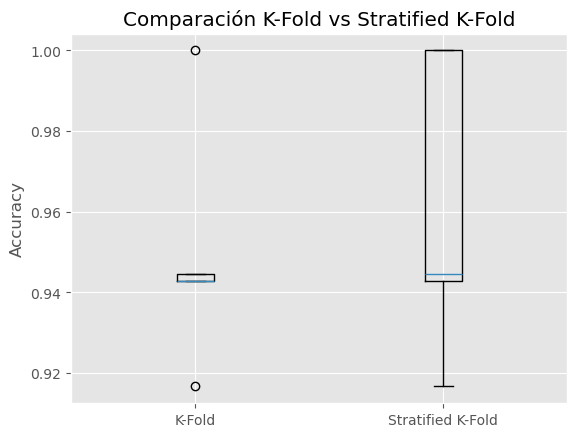

In [73]:
juntos = [kf_scores, skf_scores]
plt.boxplot(juntos, vert=True, tick_labels=["K-Fold", "Stratified K-Fold"])

plt.ylabel("Accuracy")
plt.title("Comparación K-Fold vs Stratified K-Fold")

plt.show()

La precisión al usar **Stratified K-Fold** es levemente superior ($0.9608 ± 0.0335$) al del **K-Fold** ($0.9494 ± 0.0274$), implicando que la primera estrategia empleada es ligeramente mejor que la segunda. Sin embargo, si nos fijamos en el margen de los errores, la estrategia **K-Fold** posee un error menor (un  $0.006$ de diferencia que es aproximadamente un $20\%$ del error) implicando que es más preciso a la hora de determinar la clasificación de un modelo). Esto se puede corroborar en el diagrama de cajas superior donde la estrategiao **K-Fold** deja dos valores atípicos, uno superior y otro inferior, mientras que en **Stratified K-Fold** estos valores están recogidos dentro, incurriendo en ese mayor error.

En conclusión, ambos modelo son buenos a la hora de clasificar el dataset, por lo tanto, es preferible escoger el modelo que sea mas estable, es decir, aquel que tenga el menor error, o lo que es lo mismo, aquel que usa **K-Fold**.

##### Buscar parámetros óptimos con GridSearchCV entrenando modelos SVM

- Importa las librerías y módulos necesarios de Python y Scikit-Learn, incluyendo el módulo svm para el modelo SVM y model_selection para GridSearchCV
- Elige y carga un dataset de Scikit-Learn adecuado para trabajar con un modelo SVM
- Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split
- Crea una instancia del modelo SVM que deseas optimizar
- Establece un diccionario de parámetros para probar con GridSearch. Incluye parámetros como C, kernel, gamma y otros relevantes para el modelo SVM
- Configura GridSearchCV con el modelo SVM, el diccionario de parámetros, y cualquier otra configuración relevante como la métrica de evaluación y el número de folds para la validación cruzada
- Entrena GridSearchCV con el conjunto de entrenamiento para buscar los mejores parámetros
- Una vez que GridSearchCV haya encontrado la mejor combinación de parámetros, evalúa este modelo óptimo en el conjunto de prueba
- Utiliza métricas de rendimiento adecuadas, como la precisión o el área bajo la curva ROC, para evaluar su desempeño
- Revisa los parámetros que GridSearchCV ha identificado como óptimos

In [74]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos nuevamente el dataset `wine` de la libreria **Scikit-learn** y le aplicamos el preprocesamiento. Posteriormente dividimos el conjunto de datos y estandarizamos los conjuntos de datos de entrenamiento y prueba.

In [75]:
#Cargamos dataset de vinos
vinos_raw=datasets.load_wine()
vinos_data=pd.DataFrame(vinos_raw.data, columns= vinos_raw.feature_names)
print(f'\nComprobamos si existe algún valor nulo:\n{vinos_data.isnull().sum()}')


Comprobamos si existe algún valor nulo:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [76]:
#Definimos las características y la varibale objetivo 
X= vinos_data #Nos quedamos con todo menos la variable objetivo
y=vinos_raw.target #variable objetivo

In [77]:
#Ahora dividimos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [78]:
#Standard
std= StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.fit_transform(X_test)

Una vez separados los conjunto en entramiento y prueba, definimos el modelo **SVC**, configuramos **GridSearchCV** y entrenamos el modelo.

In [79]:
#Definimos el modelo de SVM y mostramos sus parametros
svm = SVC(probability=True)
print(SVC.get_params(svm))

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [80]:
#Definimos los parámetros para el GridSearchCV
param_grid = {
    'C': [0.05, 0.1, 0.5, 1, 10, 50, 100],  #Parámetro de regularización (Por defecto es 1.0)
    'kernel': ['linear', 'rbf', 'poly'],  # Tipos de kernel (Lineales, No Lineales, Polinómicos de grado 3 por defecto)
    'gamma': ['scale', 'auto']  # Solo para los kernels 'rbf' y 'poly'
}

In [81]:
#Configuramos los parámetros del grid y entrenamos el modelo
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

#Entrenamos el GridSearchCV
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.05, 0.1, 0.5, 1, 10, 50, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

Una vez se ha entrenado el modelo lo evaluamos comprobando la precisión y el Informe de Clasificación, el impacto del parámetro **C** en la precisión y analizando la Curva **ROC**.

In [82]:
#Evaluamos el mejor modelo y mostramos los resultados
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Precisión en el conjunto de prueba: {accuracy_score(y_test, y_pred):.4f}")
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Mejores parámetros encontrados: {'C': 0.05, 'gamma': 'scale', 'kernel': 'linear'}
Precisión en el conjunto de prueba: 1.0000
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



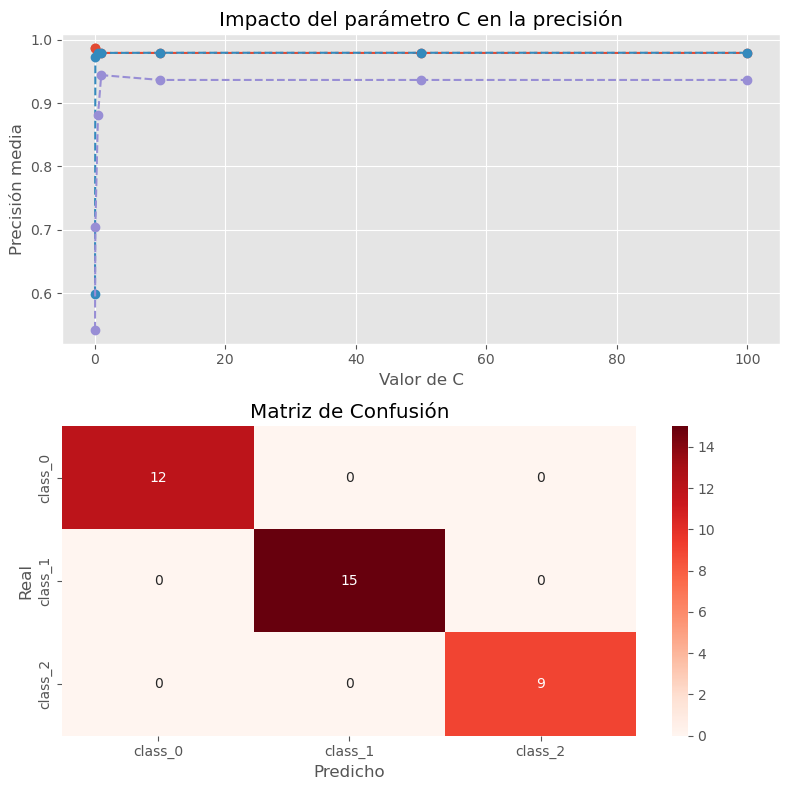

In [83]:
#Visualizamos los resultados del GridSearch
results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.groupby(['param_C','param_kernel'])['mean_test_score'].mean().unstack()

fig, ax = plt.subplots(2,1, figsize=(8, 8))

for kernel in param_grid['kernel']:
    if kernel in pivot_table.columns:        
        ax[0].plot(pivot_table.index, pivot_table[kernel], marker='o', linestyle='--', label =f'Kernel: {kernel}')


ax[0].set_xlabel("Valor de C")
ax[0].set_ylabel("Precisión media")
ax[0].set_title("Impacto del parámetro C en la precisión")
plt.grid()    

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d', xticklabels=vinos_raw.target_names, yticklabels=vinos_raw.target_names)
ax[1].set_xlabel("Predicho")
ax[1].set_ylabel("Real")
ax[1].set_title("Matriz de Confusión")

plt.tight_layout()
plt.show()

In [84]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [85]:
best_params = grid_search.best_params_  # Obtiene los mejores hiperparámetros

# Crear un nuevo modelo con probability=True y los mejores parámetros
best_svc = SVC(**best_params, probability=True)
best_svc.fit(X_train, y_train)

# Ahora puedes calcular el área bajo la curva ROC
y_scores = best_svc.predict_proba(X_test)[:, 1]  # Para clasificación binaria

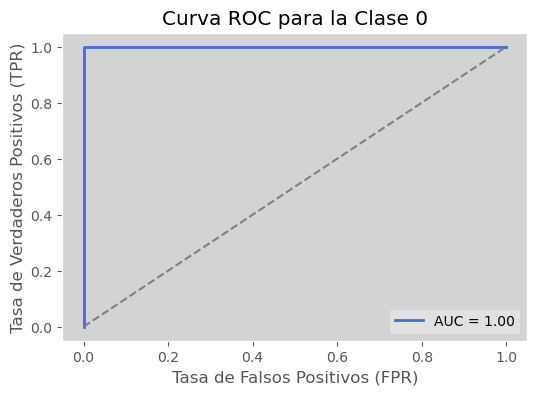

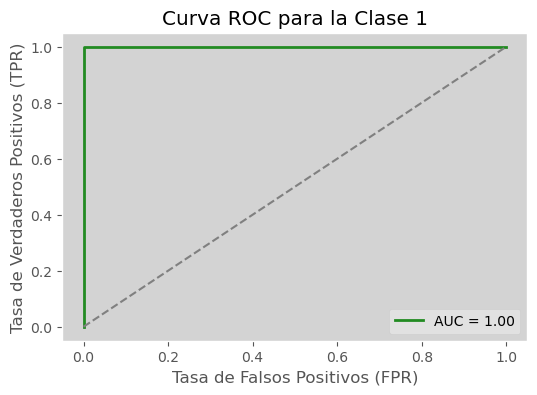

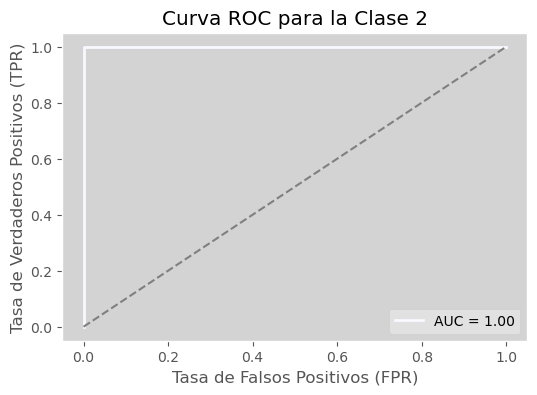

In [86]:
from sklearn.preprocessing import label_binarize

#Binarizamos etiquetas para poder hacer una clasificación multiclase
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]  # Número de clases

#Obtenemos las probabilidades del modelo SVC entrenado
y_scores = best_svc.predict_proba(X_test)

myColours = ['royalblue','forestgreen','ghostwhite']

#Visualizamos la curva ROC para cada clase
for i in range(n_classes):

    plt.figure(figsize=(6, 4))
    plt.gca().set_facecolor('lightgray')
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])  # Curva ROC para cada clase
    roc_auc = auc(fpr, tpr)  # Área bajo la curva

    plt.plot(fpr, tpr, color= myColours[i % len(myColours)], lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Línea diagonal (azar)

    plt.xlabel("Tasa de Falsos Positivos (FPR)")
    plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
    plt.title(f"Curva ROC para la Clase {i}")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [88]:
print(f"Tamaño del conjunto de prueba: {len(y_test)} muestras")

Tamaño del conjunto de prueba: 36 muestras


La precisión de nuestro modelo es de $1.00$ lo cual indica que clasifica a la perfección el dataset de `wine`. Aunque esto puede parecer un muy buen resultado, hay que analizarlo cuidadosamente pues puede ser que esta precisión sea por algún tipo de error o que el conjunto demuestras no es lo suficientemente grande como para poder realizar una clasificación de este tipo adecuadamente.

Si se analiza el impacto del valor de la **C** en la precisión del modelo, vemos como, para valores muy bajos, el modelo se ajusta sin ninguún tipo de problema. Esto implica que no estamos incurriendo en algún tipo de over-fitting pues son los valores elevados de **C** los que permiten más errores facilitandolo.

Se puede observar tanto en el mapa de calor de la Matriz de Confusión como en las curvas ROC que el modelo clasifica a la perfección todos las muestras. Confirmando que efectivamente la precisión de $1.00$ tiene sentido.

Sin embargo, un buen método para reafirmar que el resultado obtenido es correcto, es realizar un método de CrossValidation. Si la precisión resultante es igual o similar al resultado, significa que nuestro modelo proablemente sea correcto. En caso contrario, existiría algún tipo de error en la realización del modelo que acaba dando como resultado la precisión máxima.

In [87]:
#Como la precisión es igual a 1, vamos a realizar una validación cruzada para comprobar que el resultado es confiable
X_scaled=std.fit_transform(X) #Estandarizamos la X primero 
#Hacemos una validación cruzada con 5 folds
scores = cross_val_score(SVC(C=0.05, gamma='scale', kernel='linear'), X_scaled, y, cv=5)
print(f"Precisión promedio CV: {scores.mean():.4f} ± {scores.std():.4f}")

Precisión promedio CV: 0.9776 ± 0.0208


Usando el método de CrossValidation usando el mismo modelo obtenemos una precisión promedio de $0.9776 ± 0.0208$ para un conjunto total de 36 muestras. Obtenemos una precisión muy alta, en la que, incluyendo el error, es posible que alcance valores muy próximos a la precisión de $1.00$ obtenida previamente. Por lo tanto, podemos concluir que el método utilizado con **GridSearchCV** es altamente confiable y da un resultado perfecto. Aunque no se descarta que esta precisión sea debida al bajo número de muestras o a un error a la hora de la codificación.